Number of detected anomalies: 16


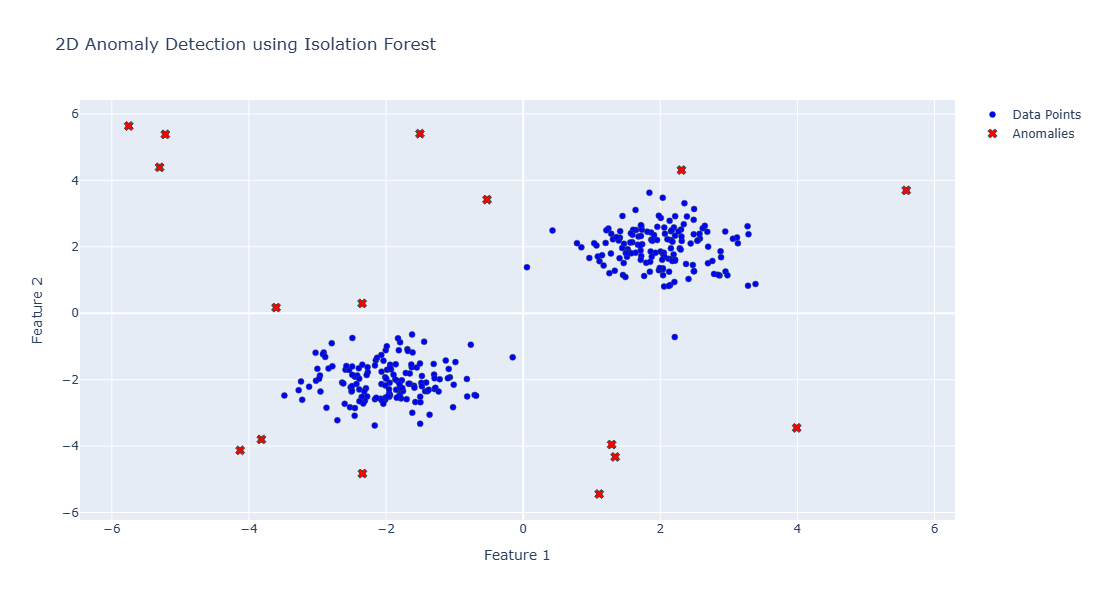

In [2]:
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_blobs
import plotly.graph_objects as go

def generate_2d_data(n_samples=300, n_anomalies=20, random_state=42):
    """Generate 2D synthetic data with normal points and anomalies."""
    np.random.seed(random_state)
    # Generate normal points centered around two clusters
    normal_data, _ = make_blobs(n_samples=n_samples, centers=[(2, 2), (-2, -2)], cluster_std=0.6, random_state=random_state)
    # Generate anomalies randomly distributed in the space
    anomalies = np.random.uniform(low=-6, high=6, size=(n_anomalies, 2))
    # Combine normal data and anomalies
    X = np.vstack([normal_data, anomalies])
    return X

def detect_anomalies_isolation_forest(X, contamination=0.05):
    """Detect anomalies using the Isolation Forest method."""
    # Fit the Isolation Forest model
    iso_forest = IsolationForest(contamination=contamination, random_state=42)
    labels = iso_forest.fit_predict(X)
    
    # Anomalies are labeled as -1 by Isolation Forest
    anomaly_indices = np.where(labels == -1)[0]
    return anomaly_indices, labels

def plot_results(X, anomaly_indices, title="2D Anomaly Detection using Isolation Forest"):
    """Plot the data points and detected anomalies using Plotly."""
    # Normal points (label != -1)
    normal_points = go.Scatter(
        x=X[:, 0],
        y=X[:, 1],
        mode='markers',
        marker=dict(
            color=['blue' if i not in anomaly_indices else 'red' for i in range(len(X))],
            size=6,
            line=dict(width=0.5, color='DarkSlateGrey')
        ),
        name='Data Points'
    )

    # Anomalies (highlighted in red)
    anomalies = go.Scatter(
        x=X[anomaly_indices, 0],
        y=X[anomaly_indices, 1],
        mode='markers',
        marker=dict(
            color='red',
            symbol='x',
            size=8,
            line=dict(width=1, color='DarkSlateGrey')
        ),
        name='Anomalies'
    )

    # Layout settings
    layout = go.Layout(
        title=title,
        xaxis=dict(title='Feature 1'),
        yaxis=dict(title='Feature 2'),
        width=800,
        height=600,
        showlegend=True
    )

    # Create the figure
    fig = go.Figure(data=[normal_points, anomalies], layout=layout)
    fig.show()

def main():
    # Generate synthetic 2D data
    X = generate_2d_data(n_samples=300, n_anomalies=20)

    # Detect anomalies using Isolation Forest
    anomaly_indices, _ = detect_anomalies_isolation_forest(X, contamination=0.05)
    print(f"Number of detected anomalies: {len(anomaly_indices)}")

    # Plot the results using Plotly
    plot_results(X, anomaly_indices)

if __name__ == "__main__":
    main()
